# Library

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [111]:
missing_values = ["n/a", "na", "--", " ", "N/A", "NA","unknown"]

df = pd.read_csv('smartphones.csv', na_values=missing_values)
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [112]:
baris,kolom = df.shape
print('baris:', baris)
print('kolom:', kolom)

baris: 1020
kolom: 11


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [114]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

# Preprocessing & Cleaning

In [117]:
# hapus fitur yang tidak perlu
df.drop(['rating','card','price','model'], axis=1, inplace=True)

In [118]:
# hapus missing value
df.dropna(inplace=True)

In [119]:
df.sample(3)

,sim,processor,ram,battery,display,camera,os
122,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor, Octa Core Processor","6 GB RAM, 128 GB inbuilt",4410 mAh Battery with Fast Charging,"6.14 inches, 1080 x 2400 px Display with Punch...",12.2 MP + 12 MP Dual Rear & 8 MP Front Camera,Android v12
72,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 4 Gen 1, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.58 inches, 1080 x 2408 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,Android v12
875,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",Octa Core Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.52 inches, 720 x 1600 px Display with Water ...",50 MP + 2 MP Triple Rear & 5 MP Front Camera,EMUI v12


In [120]:
# pecah kolom ram menjadi dua kolom yaitu ram dan rom
df[['ram','rom']] = df['ram'].str.extract(r'(\d+)\s*GB RAM, (\d+)\s*GB inbuilt')

In [121]:
df.head()

,sim,processor,ram,battery,display,camera,os,rom
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,256
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,64
3,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,128


In [122]:
# Pecah kolom battery menjadi 2 kolom
df['battery_mah(mAh)'] = df['battery'].str.extract('(\d+)').astype(float)
df[['battery', 'fast_charging']] = df['battery'].str.extract(r'(\d+) mAh Battery(?: with (\d+W Fast Charging|Fast Charging))?')
df['fast_charging'] = df['fast_charging'].apply(lambda x: 1 if x else 0)

# drop kolom battery
df.drop('battery', axis=1, inplace=True)

In [123]:
df.head()

,sim,processor,ram,display,camera,os,rom,battery_mah(mAh),fast_charging
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,256,5000.0,1
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128,5000.0,1
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,64,5000.0,1
3,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128,5000.0,1
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,128,5000.0,1


In [124]:
# pecah kolom camera menjadi 4 kolom,yaitu camera 1, camera 2, camera 3, dan front camera
df[['camera_1', 'camera_2', 'camera_3', 'front_camera']] = df['camera'].str.extract(r'(\d+).+?(\d+).+?(\d+).+?(\d+)')

df.drop('camera', axis=1, inplace=True)

df.head()

,sim,processor,ram,display,os,rom,battery_mah(mAh),fast_charging,camera_1,camera_2,camera_3,front_camera
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",Android v13,256,5000.0,1,50,48,32,16
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",Android v12,128,5000.0,1,64,2,2,16
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",Android v13,64,5000.0,1,50,2,2,13
3,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",Android v12,128,5000.0,1,50,8,2,16
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",Android v13,128,5000.0,1,108,8,2,16


In [125]:
# cek missing value
df.isnull().sum()

sim                   0
processor             0
ram                  30
display               0
os                    0
rom                  30
battery_mah(mAh)      0
fast_charging         0
camera_1            464
camera_2            464
camera_3            464
front_camera        464
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sim               1003 non-null   object 
 1   processor         1003 non-null   object 
 2   ram               973 non-null    object 
 3   display           1003 non-null   object 
 4   os                1003 non-null   object 
 5   rom               973 non-null    object 
 6   battery_mah(mAh)  1003 non-null   float64
 7   fast_charging     1003 non-null   int64  
 8   camera_1          539 non-null    object 
 9   camera_2          539 non-null    object 
 10  camera_3          539 non-null    object 
 11  front_camera      539 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 101.9+ KB


In [127]:
# handling missing value dengan modus
df['ram'] = df['ram'].fillna(df['ram'].mode()[0])
df['rom'] = df['rom'].fillna(df['rom'].mode()[0])
df['camera_1'] = df['camera_1'].fillna(df['camera_1'].mode()[0])
df['camera_2'] = df['camera_2'].fillna(df['camera_2'].mode()[0])
df['camera_3'] = df['camera_3'].fillna(df['camera_3'].mode()[0])
df['front_camera'] = df['front_camera'].fillna(df['front_camera'].mode()[0])

In [128]:
# cek missing value
df.isnull().sum()

sim                 0
processor           0
ram                 0
display             0
os                  0
rom                 0
battery_mah(mAh)    0
fast_charging       0
camera_1            0
camera_2            0
camera_3            0
front_camera        0
dtype: int64

In [129]:
# urutkan kolom supaya lebih mudah dibaca
df = df[['sim','display', 'processor', 'ram', 'rom','battery_mah(mAh)','fast_charging','camera_1','camera_2','camera_3','front_camera','os']]

In [130]:
df.head()

,sim,display,processor,ram,rom,battery_mah(mAh),fast_charging,camera_1,camera_2,camera_3,front_camera,os
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","6.7 inches, 1440 x 3216 px, 120 Hz Display wit...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,256,5000.0,1,50,48,32,16,Android v13
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.59 inches, 1080 x 2412 px, 120 Hz Display wi...","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,128,5000.0,1,64,2,2,16,Android v12
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.6 inches, 1080 x 2408 px, 90 Hz Display with...","Exynos 1330, Octa Core, 2.4 GHz Processor",4,64,5000.0,1,50,2,2,13,Android v13
3,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.55 inches, 1080 x 2400 px, 120 Hz Display wi...","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,128,5000.0,1,50,8,2,16,Android v12
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.7 inches, 1080 x 2412 px, 120 Hz Display wit...","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,128,5000.0,1,108,8,2,16,Android v13


In [131]:
# ubah tipe data
df['ram'] = df['ram'].astype(int)
df['rom'] = df['rom'].astype(int)
df['battery_mah(mAh)'] = df['battery_mah(mAh)'].astype(int)
df['camera_1'] = df['camera_1'].astype(int)
df['camera_2'] = df['camera_2'].astype(int)
df['camera_3'] = df['camera_3'].astype(int)
df['front_camera'] = df['front_camera'].astype(int)


In [132]:
df.head()

,sim,display,processor,ram,rom,battery_mah(mAh),fast_charging,camera_1,camera_2,camera_3,front_camera,os
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","6.7 inches, 1440 x 3216 px, 120 Hz Display wit...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,256,5000,1,50,48,32,16,Android v13
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.59 inches, 1080 x 2412 px, 120 Hz Display wi...","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,128,5000,1,64,2,2,16,Android v12
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.6 inches, 1080 x 2408 px, 90 Hz Display with...","Exynos 1330, Octa Core, 2.4 GHz Processor",4,64,5000,1,50,2,2,13,Android v13
3,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.55 inches, 1080 x 2400 px, 120 Hz Display wi...","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,128,5000,1,50,8,2,16,Android v12
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","6.7 inches, 1080 x 2412 px, 120 Hz Display wit...","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,128,5000,1,108,8,2,16,Android v13


In [133]:
# encoding kategori dengan scikit-learn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [134]:
df['sim'] = label.fit_transform(df['sim'])
df['display'] = label.fit_transform(df['display'])
df['processor'] = label.fit_transform(df['processor'])
df['os'] = label.fit_transform(df['os'])

In [135]:
df.head()

,sim,display,processor,ram,rom,battery_mah(mAh),fast_charging,camera_1,camera_2,camera_3,front_camera,os
0,8,263,239,12,256,5000,1,50,48,32,16,9
1,6,188,219,6,128,5000,1,64,2,2,16,7
2,6,200,69,4,64,5000,1,50,2,2,13,9
3,6,161,168,6,128,5000,1,50,8,2,16,7
4,6,251,32,6,128,5000,1,108,8,2,16,9


In [136]:
# hpus kolom fast_charging
df.drop(['fast_charging', 'processor'], axis=1, inplace=True)

In [137]:
# hapus kolom fast_charging
df.corr()

,sim,display,ram,rom,battery_mah(mAh),camera_1,camera_2,camera_3,front_camera,os
sim,1.000000,-0.154161,-0.343757,-0.266494,-0.015481,-0.132040,-0.092034,-0.172737,-0.197662,-0.113239
display,-0.154161,1.000000,0.376323,0.320687,0.407558,0.201981,0.211261,-0.060861,-0.079603,0.050818
ram,-0.343757,0.376323,1.000000,0.718609,0.051524,0.210889,0.310970,0.119112,0.144236,0.339948
rom,-0.266494,0.320687,0.718609,1.000000,0.023475,0.148683,0.245051,0.064670,0.055688,0.315091
battery_mah(mAh),-0.015481,0.407558,0.051524,0.023475,1.000000,0.120906,0.004439,-0.280970,-0.287403,-0.278978
camera_1,-0.132040,0.201981,0.210889,0.148683,0.120906,1.000000,0.186848,-0.160547,-0.048088,0.057070
camera_2,-0.092034,0.211261,0.310970,0.245051,0.004439,0.186848,1.000000,0.245382,0.197904,0.333423
camera_3,-0.172737,-0.060861,0.119112,0.064670,-0.280970,-0.160547,0.245382,1.000000,0.911720,0.134030
front_camera,-0.197662,-0.079603,0.144236,0.055688,-0.287403,-0.048088,0.197904,0.911720,1.000000,0.120038
os,-0.113239,0.050818,0.339948,0.315091,-0.278978,0.057070,0.333423,0.134030,0.120038,1.000000


In [138]:
# cek semua nilai unik
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

sim
[ 8  6  7  4 11  9 13 12 15 22 20  2  1 19 23 14 21  0 10 18 16 17 24  3
  5]

display
[263 188 200 161 251 198  51 228 100 273 175 183 320 148 166 167 246 121
 258 114 169  59  86 319 235 230 185 193 138 292 140 192  89 199 256  98
 190 163 197 196 344 173 110 124  71  52 178 158 142 123 301 203 302 355
  53 164 281 275  48 113 305   4 204 151 112 278 248  60 244 115  49 227
 141 189 217  22 150 265 212 241 252 296  11  88 257 277 300 211 160  20
 201 182 171 249 137  57  14 234 336 162 172 229 208 181 328 130 260 342
 168 238 266 354 106  77 316 250 334  58 245  90  12 269  26 335 294  27
 191  80 255  87 209  39 323 348 349 214 321 329 202 264 312 139 159  28
  66 165 236 332 317 132 105  31  92   7  62 134 216 315 290 128  10 279
 271 239 308 135 116 108 147 324  18 309   6 213  36 330 242 272  35  68
 310  95 351 153 325 270  61  17  29 136  23 356 283 107  50  79 222 223
 304 221 224  72  42  38 282 180 174 313 220 284 289 339 144   8  65 102
 293  99 347  44 179 253 205  30 

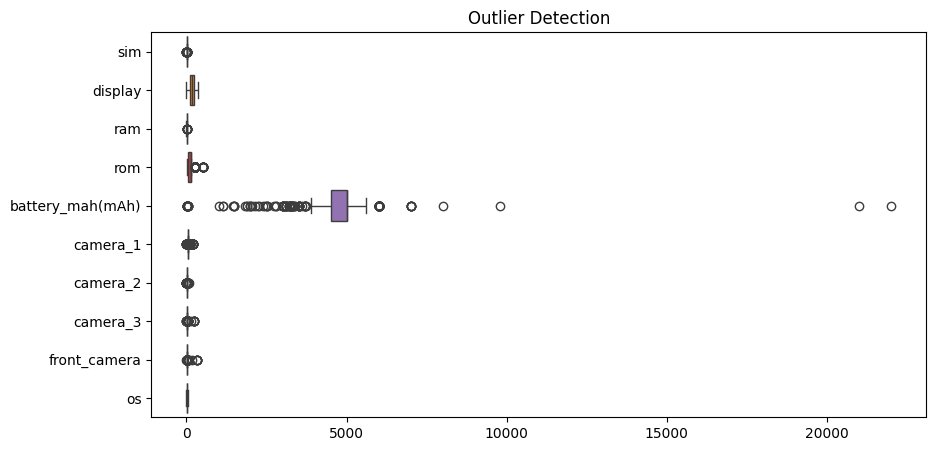

In [139]:
# cek outlier
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient='h')
plt.title('Outlier Detection')
plt.show()

In [140]:
# standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,sim,display,ram,rom,battery_mah(mAh),camera_1,camera_2,camera_3,front_camera,os
0,-0.452628,1.030571,1.991281,1.418991,0.257877,-0.113783,4.027288,1.364734,-0.140625,-0.446071
1,-1.146266,0.138734,-0.218887,-0.093293,0.257877,0.464482,-0.784350,-0.161500,-0.140625,-0.589081
2,-1.146266,0.281428,-0.955609,-0.849434,0.257877,-0.113783,-0.784350,-0.161500,-0.259752,-0.446071
3,-1.146266,-0.182327,-0.218887,-0.093293,0.257877,-0.113783,-0.156745,-0.161500,-0.140625,-0.589081
4,-1.146266,0.887877,-0.218887,-0.093293,0.257877,2.281886,-0.156745,-0.161500,-0.140625,-0.446071


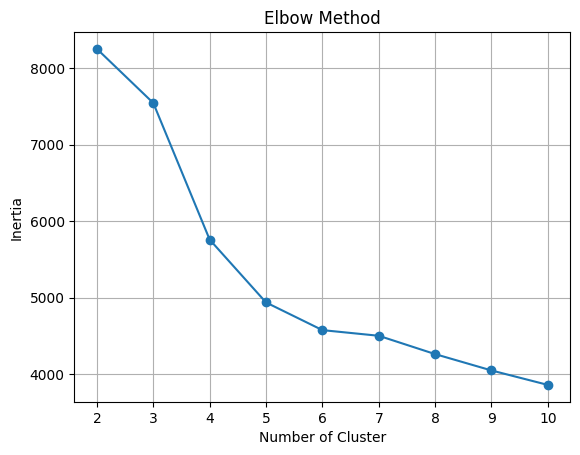

In [141]:
# # cek cluster yang optimal dengan elbow method dan silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# buat list inertia
inertia = []

# buat list silhouette
silhouette = []

# buat list jumlah cluster
n_cluster = list(range(2,11))

for i in n_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, kmeans.labels_))
    
# buat plot inertia
plt.plot(n_cluster, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [142]:
# implmentasi
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

df['cluster'] = y_kmeans
df.head(3)

,sim,display,ram,rom,battery_mah(mAh),camera_1,camera_2,camera_3,front_camera,os,cluster
0,8,263,12,256,5000,50,48,32,16,9,1
1,6,188,6,128,5000,64,2,2,16,7,2
2,6,200,4,64,5000,50,2,2,13,9,2


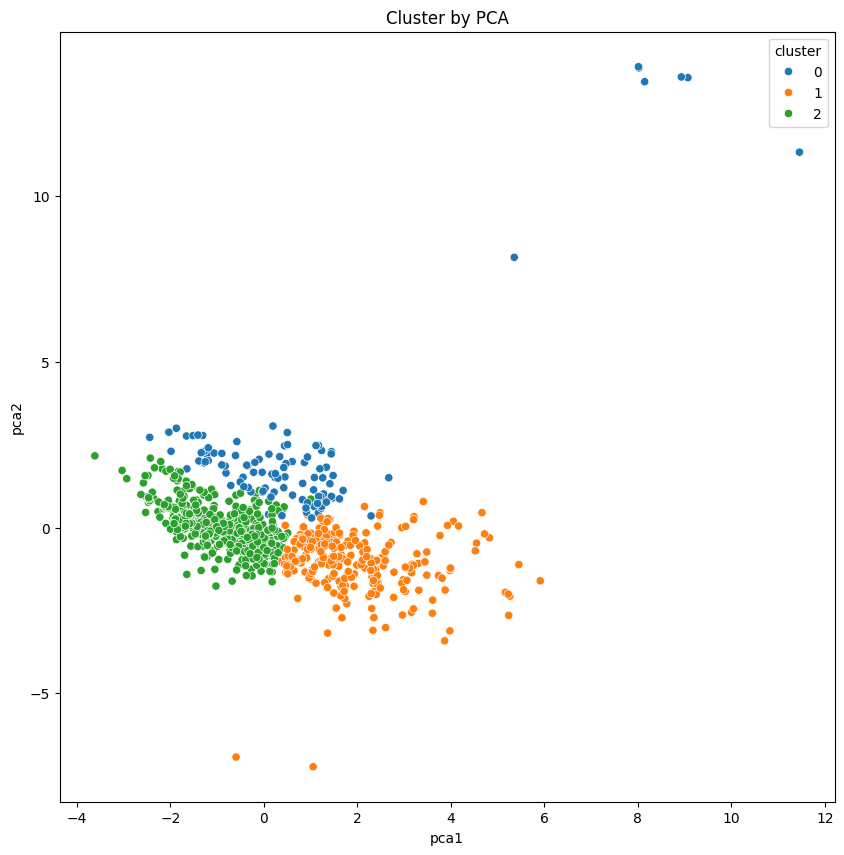

In [146]:
# gunakan PCA untuk mengurangi dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = y_kmeans

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='tab10')
plt.title('Cluster by PCA')
plt.show()


In [144]:
# hitung Silhouette Score, Calinski-Harabasz Index, dan Davies-Bouldin Index
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print('Silhouette Score:', silhouette_score(df_scaled, y_kmeans))
print('Calinski-Harabasz Index:', calinski_harabasz_score(df_scaled, y_kmeans))
print('Davies-Bouldin Index:', davies_bouldin_score(df_scaled, y_kmeans))

Silhouette Score: 0.29637472574432694
Calinski-Harabasz Index: 173.51412509054285
Davies-Bouldin Index: 1.6822007487167403


In [145]:
# Add K-Means Prediksi ke Data Frame
df_scaled['cluster'] = y_kmeans

# Rata-Rata tiap Cluster
df_scaled.groupby('cluster').mean().T

cluster,0,1,2
sim,0.383453,-0.432152,0.119623
display,-1.440135,0.859882,-0.115698
ram,-0.209020,1.039794,-0.416732
rom,-0.162493,0.961399,-0.390871
battery_mah(mAh),-1.636113,0.193528,0.210965
camera_1,-0.342434,0.509597,-0.160884
camera_2,-0.021324,0.682378,-0.294413
camera_3,0.615698,0.067905,-0.140904
front_camera,0.620938,0.074185,-0.144596
os,1.126409,0.900130,-0.596924
